In [48]:
import numpy as np
from numpy import ones
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import numpy as np
from numpy import ndarray
from numpy import genfromtxt
from numpy import mean
from numpy.random import rand
from scipy.integrate import quad
from sklearn.model_selection import train_test_split
import sys
import scipy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.set_printoptions(precision=4)
np.set_printoptions(threshold=30)
np.set_printoptions(linewidth=300)
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)

#Q1

In [26]:
#watched

#Q2

In [27]:
X = genfromtxt('job_right_out_of_college_X.csv', delimiter=',')
y = genfromtxt('job_right_out_of_college_y.csv', delimiter=',')
print (X.shape)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

(1000, 7)


In [28]:
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_val = scale.transform(X_val)
X_test = scale.transform(X_test)
np.mean(X_train)

np.float64(0.5042988673884833)

In [29]:
#gradient descent with L1 Regularizer
#starting variables
def set_variables(X,y):
  phi = np.hstack((X, np.ones((X.shape[0], 1))))
  w = np.ones(phi.shape[1])
  n = X.shape[0]
  return phi, w, n

#functions
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def q(x=None, X=None, w=None, lmbda=0.01):
	if X is None:
		return (sigmoid(x.T.dot(w)) + lmbda*np.linalg.norm(w))
	else:
		return (sigmoid(X.dot(w)) + lmbda*np.linalg.norm(w))

def dL(phi, y, w, lmbda=0.01):
	return 1/n * (phi.T.dot(q(None, phi, w) - y) + lmbda * np.sign(w))
def gradient_descent(phi, y, w, η=0.1):
	for i in range(2000):
		w = w - η*dL(phi, y, w)
	return w

phi, w, n= set_variables(X_train, y_train)
final_w = gradient_descent(phi, y_train, w)
print(final_w)


[-0.6718  0.8964 -1.1659  2.1809 -1.936   5.6645  2.302  -6.2105]


In [30]:
X_test_with_bias = np.hstack((X_test, np.ones((X_test.shape[0], 1))))
y_pred_prob = sigmoid(X_test_with_bias.dot(final_w))  # Last weight is the bias term
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert to binary labels

# Compute accuracy
accuracy = np.mean(y_pred == y_test) * 100
print(f"Classification Accuracy: {accuracy:.2f}%")

Classification Accuracy: 90.00%


#Q3

In [31]:
def p_M(x):
    if x >= 40000:
        return np.exp(-(x-40000))
    else:
        return 0

def p_E(x):
    if 30000 <= x <= 180000:
        return 1/150000
    else:
        return 0

def p_A(x):
    return scipy.stats.norm(loc=60000, scale=3000).pdf(x)

def entropy(f, a, b):
    def integrand(x):
        px = f(x)
        return -px * np.log(px) if px > 0 else 0
    return quad(integrand, a, b)[0]

# Calculate entropy integrals
entropy_M = entropy(p_M, 30000, 180000)
entropy_E = entropy(p_E, 30000, 180000)
entropy_A = entropy(p_A, 30000, 180000)

def sample_entropy(f, a, b, num_samples=10000):
    samples = np.linspace(a, b, num_samples)
    px_values = np.array([f(x) for x in samples])
    px_values = px_values[px_values > 0]
    return -np.sum(px_values * np.log(px_values)) * (b - a) / num_samples

entropy_M_sampled = sample_entropy(p_M, 30000, 180000)
entropy_E_sampled = sample_entropy(p_E, 30000, 180000)
entropy_A_sampled = sample_entropy(p_A, 30000, 180000)

entropies = {
    "Student Max": entropy_M,
    "Student Ella": entropy_E,
    "Student Anoushka": entropy_A
}
most_uncertain_student = max(entropies, key=entropies.get)

# Print results
print(f"Entropy (Integral) - Student Max: {entropy_M}, Student Ella: {entropy_E}, Student Anoushka: {entropy_A}")
print(f"Entropy (Sampling) - Student Max: {entropy_M_sampled}, Student Ella: {entropy_E_sampled}, Student Anoushka: {entropy_A_sampled}")
print(f"The student with the greatest uncertainty is {most_uncertain_student}.")


Entropy (Integral) - Student Max: 0.0, Student Ella: 11.918390573078392, Student Anoushka: 9.425306100854927
Entropy (Sampling) - Student Max: 0.22297640604222088, Student Ella: 11.918390573078392, Student Anoushka: 9.424363570244834
The student with the greatest uncertainty is Student Ella.


#Q4

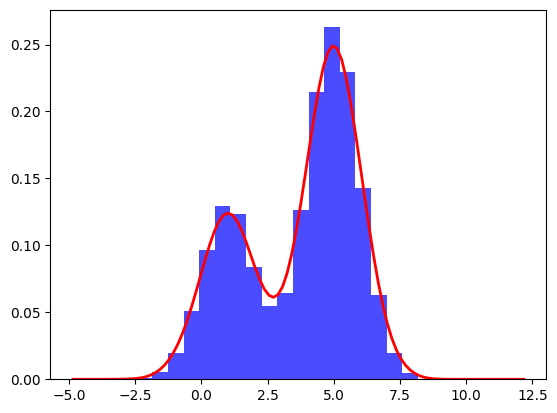

In [32]:
X = genfromtxt('hours_slept.csv', delimiter=',')
n, bins, patches = plt.hist(X,20, facecolor = 'blue', density = True, alpha= 0.7)
sigma = 0.4

n = len(X)

def p(x): # This is the kde p(x) distribution
	def gaussian(μ, sigma, x): return np.exp(-0.5 * ((x - μ) / sigma)**2) / (sigma * np.sqrt(2*np.pi))
	px = 0
	for xi in X:
		px += gaussian(xi, sigma, x)
	return px/n

x = np.linspace(np.mean(X)-4*np.std(X), np.mean(X)+4*np.std(X), 100)
y = p(x)
plt.plot(x,y, linewidth=2, color='r')
plt.show()

In [42]:
def q(x, num_samples):
  def gaussian(μ, sigma, x): return np.exp(-0.5 * ((x - μ) / sigma)**2) / (sigma * np.sqrt(2*np.pi))
  px = 0
  for i in range(num_samples):
    xi = np.random.uniform(np.mean(X)-4*np.std(X), np.mean(X)+4*np.std(X))
    px += gaussian(xi, sigma, x)
  return px/num_samples

[  50  100  150  200  250  300  350  400  450  500  550  600  650  700  750  800  850  900  950 1000 1050 1100 1150 1200 1250 1300 1350 1400 1450 1500 1550 1600 1650 1700 1750 1800 1850 1900 1950 2000 2050 2100 2150 2200 2250 2300 2350 2400 2450 2500 2550 2600 2650 2700 2750 2800 2850 2900 2950
 3000 3050 3100 3150 3200 3250 3300 3350 3400 3450 3500 3550 3600 3650 3700 3750 3800 3850 3900 3950 4000 4050 4100 4150 4200 4250 4300 4350 4400 4450 4500 4550 4600 4650 4700 4750 4800 4850 4900 4950 5000 5050 5100 5150 5200 5250 5300 5350 5400 5450 5500 5550 5600 5650 5700 5750 5800 5850 5900
 5950 6000 6050 6100 6150 6200 6250 6300 6350 6400 6450 6500 6550 6600 6650 6700 6750 6800 6850 6900 6950 7000 7050 7100 7150 7200 7250 7300 7350 7400 7450 7500 7550 7600 7650 7700 7750 7800 7850 7900 7950 8000 8050 8100 8150 8200 8250 8300 8350 8400 8450 8500 8550 8600 8650 8700 8750 8800 8850
 8900 8950 9000 9050 9100 9150 9200 9250 9300 9350 9400 9450 9500 9550 9600 9650 9700 9750 9800 9850 9900 9950]


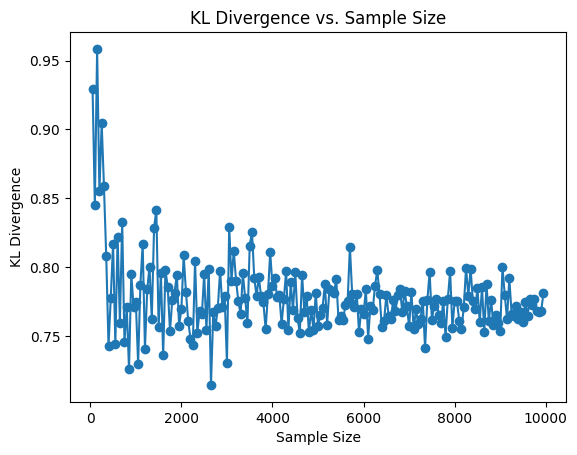

In [45]:
# Assume p(x) is precomputed for full dataset

x = np.linspace(np.mean(X)-4*np.std(X), np.mean(X)+4*np.std(X), 100)
p_vals = p(x)  # Compute p(x) using full data KDE

# Define KL Divergence Function
def kl_divergence(p_vals, q_vals):
    """ Compute KL divergence using discrete summation. """
    return entropy(p_vals, q_vals)

# Define Sample Sizes to Evaluate
sample_sizes = np.arange(50, 10000, 50)  # Sample in steps of 50
kl_values = []
print (sample_sizes)
for num_samples in sample_sizes:
    # Compute q(x, num_samples)
    q_vals = q(x, num_samples)

    # Compute KL divergence
    kl_values.append(kl_divergence(p_vals, q_vals))

# Plot KL divergence vs. sample size
plt.plot(sample_sizes, kl_values, marker='o')
plt.xlabel("Sample Size")
plt.ylabel("KL Divergence")
plt.title("KL Divergence vs. Sample Size")
plt.show()

In [49]:
#4000 seems past the threshold
#sample to build new distribution
sampled_X = np.random.choice(X, size=4000, replace=True)
y = genfromtxt('how_much_is_remembered.csv', delimiter=',')

# Load target variable
y = np.genfromtxt('how_much_is_remembered.csv', delimiter=',')

# Ensure sampled_X and y are correctly shaped
sampled_X = sampled_X.reshape(-1, 1)  # Reshape for sklearn
y_sampled = y[:4000]  # Use the corresponding subset of y

# Train Linear Regression Model
model = LinearRegression()
model.fit(sampled_X, y_sampled)

# Evaluate on full dataset
X_full = X.reshape(-1, 1)  # Reshape for sklearn
y_pred = model.predict(X_full)
mse = mean_squared_error(y, y_pred)

# Print results
print(f"Trained Model Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"Mean Squared Error on Full Dataset: {mse:.4f}")

Trained Model Coefficients: [0.0083]
Intercept: 1.9335604966944104
Mean Squared Error on Full Dataset: 22.5871
